## Obtaining the Efficient Frontier - Part III

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'FB']
pf_data = pd.read_csv('/Users/arm2/Downloads/Python for Finance and Investment (Udemy)/Walmart_FB_2014_2017.csv', index_col='Date')

In [3]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.42120141, 0.57879859])

In [4]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [5]:
np.sum(weights * log_returns.mean()) * 250

0.16786495712042443

Expected Portfolio Variance:

In [6]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.03760957376243771

Expected Portfolio Volatility:

In [7]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.19393187918039084

***

In [8]:
pf_returns = []
pf_volatilities = []

In [9]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250) #Expected Portfolio Return
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))) #Expected Portfolio Volatility
    
pf_returns, pf_volatilities

([0.09467803960582888,
  0.11409485738708255,
  0.13626537182949766,
  0.13147248986753712,
  0.2251699828038962,
  0.11675264920404628,
  0.09804583067207327,
  0.12801861206953727,
  0.12211159725426181,
  0.21879528056173653,
  0.0909971393090525,
  0.16890614513128635,
  0.24813769814934947,
  0.18929959102917623,
  0.16464602681448254,
  0.20953825990348618,
  0.23509279503139477,
  0.05224403798522652,
  0.22142699726585136,
  0.08065659154881957,
  0.09432382612412862,
  0.08630793727933371,
  0.10518579060839808,
  0.04468923363298607,
  0.10914282006455418,
  0.23844820713485193,
  0.1463280008386619,
  0.17002452389068942,
  0.066488541144437,
  0.160286732276046,
  0.14596857191294663,
  0.0688952163817368,
  0.1714292964868137,
  0.2232498458285203,
  0.14943535414711756,
  0.10647875573495863,
  0.13353680696290549,
  0.05659917425088132,
  0.1361842537614278,
  0.2013343168605946,
  0.15541930046550093,
  0.1308601350415133,
  0.07287997605946919,
  0.049670301805632575,


In [10]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([0.09467804, 0.11409486, 0.13626537, 0.13147249, 0.22516998,
        0.11675265, 0.09804583, 0.12801861, 0.1221116 , 0.21879528,
        0.09099714, 0.16890615, 0.2481377 , 0.18929959, 0.16464603,
        0.20953826, 0.2350928 , 0.05224404, 0.221427  , 0.08065659,
        0.09432383, 0.08630794, 0.10518579, 0.04468923, 0.10914282,
        0.23844821, 0.146328  , 0.17002452, 0.06648854, 0.16028673,
        0.14596857, 0.06889522, 0.1714293 , 0.22324985, 0.14943535,
        0.10647876, 0.13353681, 0.05659917, 0.13618425, 0.20133432,
        0.1554193 , 0.13086014, 0.07287998, 0.0496703 , 0.05208187,
        0.11009104, 0.25119415, 0.09686279, 0.1660237 , 0.04331029,
        0.18007454, 0.09477902, 0.19173881, 0.15409557, 0.24349978,
        0.08554183, 0.19823055, 0.09332763, 0.1381994 , 0.15944699,
        0.07628054, 0.10560502, 0.19081349, 0.26452988, 0.06980055,
        0.11335375, 0.14098224, 0.15668104, 0.1215903 , 0.09439317,
        0.12985084, 0.0773349 , 0.16474089, 0.17

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [11]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})

In [12]:
portfolios.head()

,Return,Volatility
0,0.094678,0.164010
1,0.114095,0.168781
2,0.136265,0.177221
3,0.131472,0.175145
4,0.225170,0.234468


In [13]:
portfolios.tail()

,Return,Volatility
995,0.124104,0.172218
996,0.127335,0.173462
997,0.245236,0.250839
998,0.209244,0.222166
999,0.113090,0.168472


Text(0, 0.5, 'Expected Return')

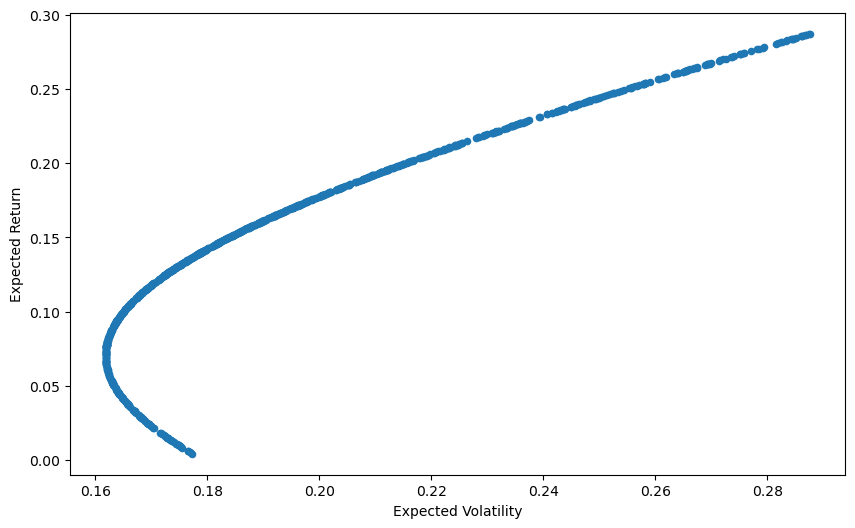

In [14]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

******